In [2]:
#Import packages
#---------------------------------------
import sys
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

#Import your modules
#---------------------------------------
import admin_functions as adfn
import criticality as crfn
import IS as isfn
import trace_analyse as tfn

# Define paths
#----------------------------------------------------------------------
Fcode = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
Fdata = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
Fdoc = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
F10t2 = '/Volumes/Dominic 10tb2/'
Ftm = '/Volumes/Dominic Time Machine/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'

%load_ext autoreload
sys.version

'3.7.4 (default, Aug 13 2019, 15:17:50) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

# Process data

In [4]:
#Find range to make bin over for correlation function
coord_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*regcoord*')

In [133]:
from sklearn.metrics.pairwise import euclidean_distances

#Find range to make bin over for correlation function
mini = 0
maxi = 0
dim = [.8, .8, 15]

for c in coord_l:
    coord = np.load(c)
    dist = euclidean_distances(coord)
    curr_max = np.max(dist)
    if maxi < curr_max:
        maxi = curr_max
print(maxi)

655.138672844927


In [334]:
#Calculate criticality statistics
trace_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*regtrace*')[:10]
dff_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*regdelt*')[:10]
bind_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*regbin*56*')[:10]
coord_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*labcoor*')[:10]
len(trace_l), len(dff_l), len(bind_l), len(coord_l)

(10, 10, 10, 10)

In [26]:
#Find mean nnb in previous work
prac = adfn.return_files(Fdata, 'PTZ-WILDTYPE', '*cutrealtrace*')
nnb_list = []
for i in range(len(prac)):
    nnb_list = np.append(nnb_list, np.load(prac[i]).shape[0]*(0.16/100))
print('mean neighbours = ' + str(np.mean(nnb_list)))

mean neighbours = 14.12128


In [ ]:
# Run avalanches across all brain areas

n_neigh = 14 #14
n_bins = 200 #Number of bins for correlation function
reg_list = ['all', 'Telencephalon', 'Diencephalon', 'Midbrain', 'Hindbrain']

for i in range(len(trace_l)):
    trace = np.load(trace_l[i])
    dff = np.load(dff_l[i])
    bind = np.load(bind_l[i])
    coord = (np.load(coord_l[i]))
    name = adfn.save_name(trace_l[i])

    for reg in reg_list:
        sub_trace, sub_dff, sub_bind, sub_coord = tfn.select_region(trace, dff, bind, coord, reg)
        data = tfn.trace_analyse(name, sub_trace, sub_dff, sub_bind, sub_coord) #Initiate class
        
        #Criticality statistics
        crit = data.criticality_stats(n_neigh, n_bins, mini, maxi) 
        par_list = ['av', 'llr_s', 'llr_d', 'exp_s', 'exp_d', 'dcc', 'br', 'corrdis']
        dic = {}
        dic.update({par: data.__dict__[par] for par in par_list})
        np.save(Fdata + 'BLNDEV-WILDTYPE/' + name + '_' + reg + '_criticality.npy', dic)
        
        #Firing statistics
        f_stats = data.firing_stats(30, 50) 
        par_list = ['fr', 'fa', 'fd', 's_corr', 'l_corr', 'dim']
        dic = {}
        dic.update({par: data.__dict__[par] for par in par_list})
        np.save(Fdata + 'BLNDEV-WILDTYPE/' + name + '_' + reg + '_firing.npy', dic)
        
        
    print('Processed ' + name)

In [ ]:
#This function extracts each data type
def load(data_list, name_list):

    obj = { i:[[]]*len(data_list) for i in name_list  }

    for i in range(len(data_list)):
        for e in range(len(data_list[i])):
            data = np.load(data_list[i][e], allow_pickle=True).item()
            for name in name_list:
                curr = data[name]
                obj[name][i] = np.append(obj[name][i], curr)

        print(i)
        
    len_list = []
    for i in range(len(data_list)):
        count = 0
        for e in range(len(data_list[i])):
            count+=1

        len_list = np.append(len_list, count)
        
    return(obj, len_list)
            
#This function sorts all data by condition
def sort(curr_name, obj):
    input_data = adfn.comb_list(obj[curr_name])

    cond = np.arange(3, 9)
    cond_l = []
    for i in range(len(len_list)):
        for e in range(int(len_list[i])):
            cond_l = np.append(cond_l, cond[i])

    df = pd.DataFrame({curr_name:input_data , "condition": cond_l})
    return(df)

# Whole brain

In [282]:
d3 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE/', '*3dpf*all*crit*')
d4 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE/', '*4dpf*all*crit*')
d5 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE/', '*5dpf*all*crit*')
d6 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE/', '*6dpf*all*crit*')
d7 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE/', '*7dpf*all*crit*')
d8 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE/', '*8dpf*all*crit*')
data_ll = d3, d4, d5, d6, d7, d8

In [ ]:
name_list = ['br', 'dcc', 'exp_s', 'exp_d']
obj, len_list = load(data_ll, name_list)
br_df = sort('br', obj)
dcc_df = sort('dcc', obj)
xs_df = sort('exp_s', obj)
xd_df = sort('exp_d', obj)

## Critical stats

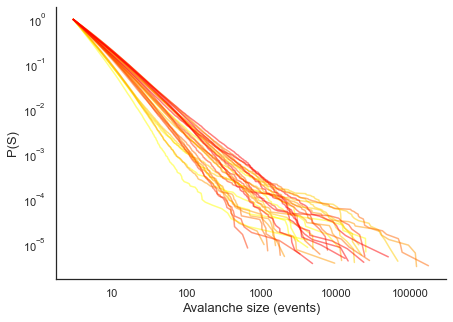

In [285]:
#Avalanche size - all distributions

import matplotlib
from matplotlib import cm
import powerlaw
colors  = cm.autumn_r(np.linspace(0,1,len(data_ll)))
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    for e in range(len(data_ll[i])):
        data = np.load(data_ll[i][e], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 0.5, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

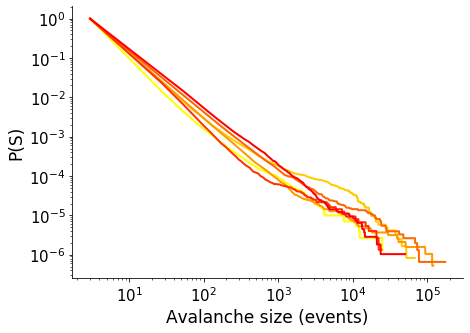

In [5]:
#Avalanche size - mean distribution

colors  = cm.autumn_r(np.linspace(0,1,len(data_ll)))
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    yaxis, xaxis = crfn.mean_av(data_ll[i], 1000, 'size')
    hist = plt.plot(yaxis, xaxis, c = colors[i], linewidth = 2)

axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 15)
plt.xticks(size = 15)
#plt.savefig(Ffig + 'avsize_ptz_mean.svg', transparent = True)
plt.show()

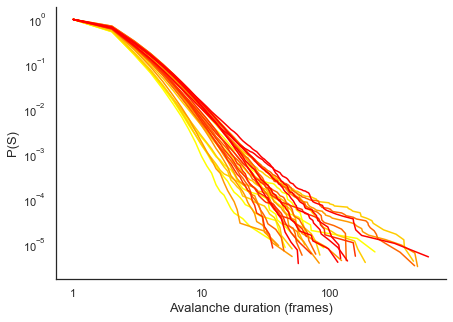

In [90]:
#Avalanche dur - all distributions


import matplotlib
from matplotlib import cm
import powerlaw
colors  = cm.autumn_r(np.linspace(0,1,len(data_ll)))
choose=1
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    for e in range(len(data_ll[i])):
        data = np.load(data_ll[i][e], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche duration (frames)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

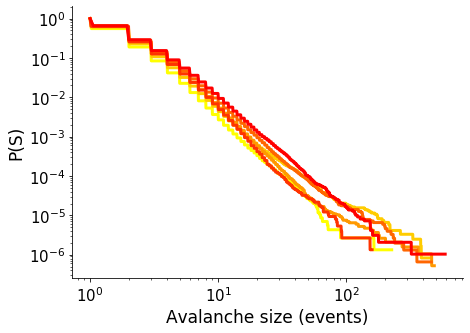

In [7]:
#Avalanche dur - mean distributions


colors  = cm.autumn_r(np.linspace(0,1,len(data_ll)))
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    yaxis, xaxis = crfn.mean_av(data_ll[i], 10000, 'dur')
    hist = plt.plot(yaxis, xaxis, c = colors[i], linewidth = 3)

axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 15)
plt.xticks(size = 15)
#plt.savefig(Ffig + 'avsize_ptz_mean.svg', transparent = True)
plt.show()

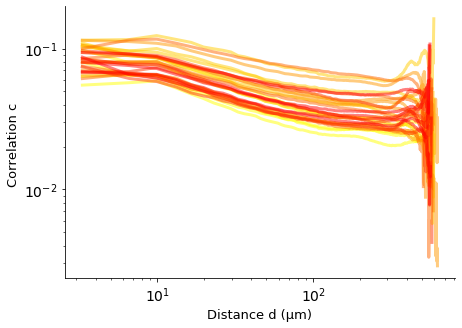

In [8]:
#Correlation function

import matplotlib
from matplotlib import cm
import powerlaw
colors  = cm.autumn_r(np.linspace(0,1,len(data_ll)))
choose=1
fig, axarr = plt.subplots(figsize = (7,5))


for i in range(len(data_ll)):
    for e in range(len(data_ll[i])):
        data = np.load(data_ll[i][e], allow_pickle=True).item()
        yaxis,xaxis = data['corrdis']
        axarr.plot(yaxis,xaxis, '-', linewidth = 3, alpha =0.5, color = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_xlabel('Distance d (μm)', size = '13')
axarr.set_ylabel('Correlation c ', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.show()

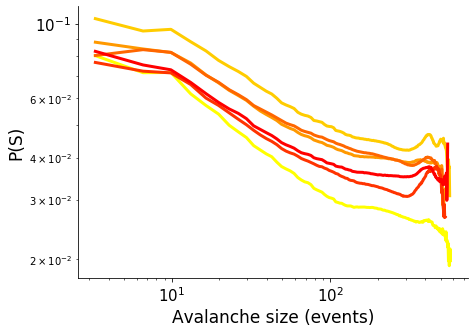

In [9]:
colors  = cm.autumn_r(np.linspace(0,1,len(data_ll)))
fig, axarr = plt.subplots(figsize = (7,5))

for e in range(len(data_ll)):
    
    data_l = data_ll[e]
    mean_y, mean_x = np.mean(np.asarray([np.load(data_l[i], allow_pickle=True).item()['corrdis'] for i in range(len(data_l))]), axis=0)
    yaxis,yaxis = data['corrdis']
    axarr.plot(mean_y,mean_x, '-', linewidth = 3, alpha = 1, color = colors[e])

axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 15)
plt.xticks(size = 15)
#plt.savefig(Ffig + 'avsize_ptz_mean.svg', transparent = True)
plt.show()

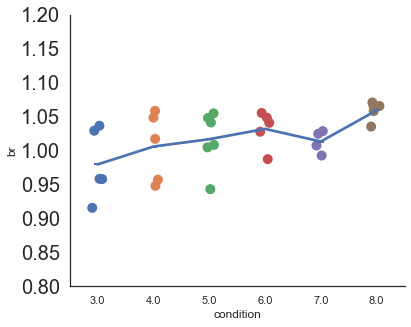

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
    
data_name = 'br'
dic = br_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0.8, 1.2)
plt.show()


In [14]:
from scipy import stats
stats.pearsonr(dic['br'], dic['condition'])

(0.520481039193331, 0.0031924600255140486)

In [15]:
from scipy import stats
stats.spearmanr(dic['br'], dic['condition'])

SpearmanrResult(correlation=0.47021031077701975, pvalue=0.00874024680748428)

In [82]:
adfn.save_shared_files(Fcode, 'criticality', 'admin')

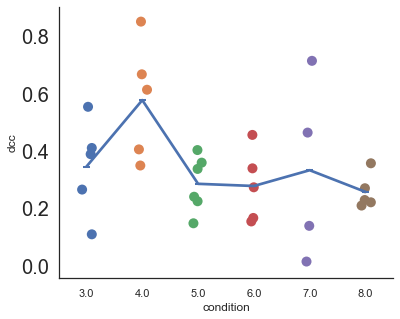

In [16]:
import seaborn as sns
data_name = 'dcc'
dic = dcc_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [17]:
from scipy import stats
stats.spearmanr(dic['dcc'], dic['condition'])

SpearmanrResult(correlation=-0.33122300202527116, pvalue=0.07378386630882768)

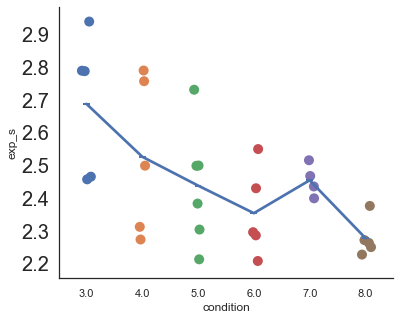

In [18]:
data_name = 'exp_s'
dic = xs_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [19]:
from scipy import stats
stats.spearmanr(dic['exp_s'], dic['condition'])

SpearmanrResult(correlation=-0.5588824087306516, pvalue=0.0013262845542400274)

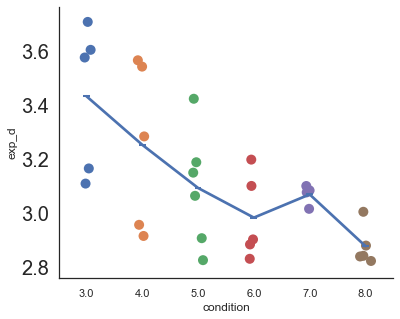

In [20]:
data_name = 'exp_d'
dic = xd_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [21]:
from scipy import stats
stats.spearmanr(dic['exp_d'], dic['condition'])

SpearmanrResult(correlation=-0.659738459074859, pvalue=7.309077938858285e-05)

## Firing stats

In [23]:
name_list = ['fr', 'fa', 'fd', 's_corr', 'l_corr', 'dim']
obj, len_list = load(data_ll, name_list)
fr_df = sort('fr', obj)
fa_df = sort('fa', obj)
fd_df = sort('fd', obj)
sc_df = sort('s_corr', obj)
lc_df = sort('l_corr', obj)
dim_df = sort('dim', obj)

0
1
2
3
4
5


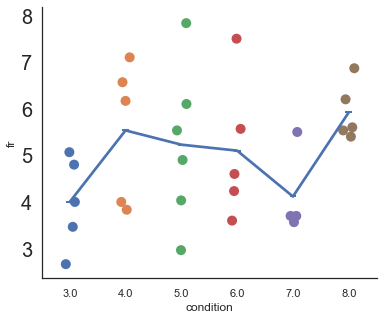

In [24]:
data_name = 'fr'
dic = fr_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [25]:
from scipy import stats
stats.spearmanr(dic['fr'], dic['condition'])

SpearmanrResult(correlation=0.2167887678073703, pvalue=0.24985763209950937)

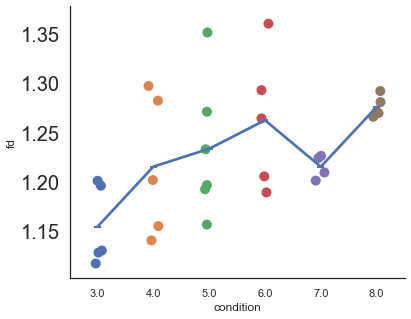

In [26]:
data_name = 'fd'
dic = fd_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [27]:
from scipy import stats
stats.spearmanr(dic['fd'], dic['condition'])

SpearmanrResult(correlation=0.5284225277542133, pvalue=0.002684437354955253)

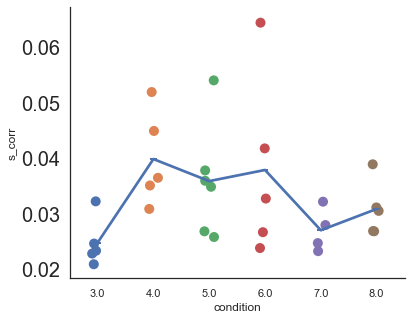

In [28]:
data_name = 's_corr'
dic = sc_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [29]:
from scipy import stats
stats.spearmanr(dic['s_corr'], dic['condition'])

SpearmanrResult(correlation=0.06227353444071856, pvalue=0.7437356576460878)

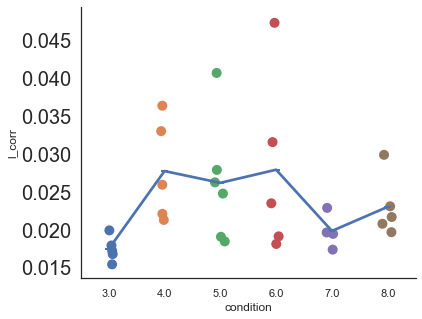

In [30]:
data_name = 'l_corr'
dic = lc_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [31]:
from scipy import stats
stats.spearmanr(dic['l_corr'], dic['condition'])

SpearmanrResult(correlation=0.1786979683951054, pvalue=0.3447535257954929)

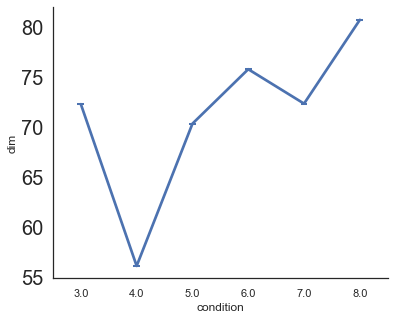

In [132]:
data_name = 'dim'
dic = dim_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

# All regions

In [286]:
d3 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*3dpf*n_crit*')
d4 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*4dpf*n_crit*')
d5 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*5dpf*n_crit*')
d6 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*6dpf*n_crit*')
d7 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*7dpf*n_crit*')
d8 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*8dpf*n_crit*')
data_ll = d3, d4, d5, d6, d7, d8


In [287]:
#This function extracts each data type
def load_comb(data_list, name_list):

    obj = { i:[[]]*len(data_list) for i in name_list  }

    for i in range(len(data_list)):
        for e in range(len(data_list[i])):
            data = np.load(data_list[i][e], allow_pickle=True).item()
            for name in name_list:
                curr = data[name]
                obj[name][i] = np.append(obj[name][i], curr)

        print(i)
        
    len_list = []
    for i in range(len(data_list)):
        count = 0
        for e in range(len(data_list[i])):
            count+=1

        len_list = np.append(len_list, count)
        
    return(obj, len_list)

#This function sorts all data by condition
def sort_comb(curr_name, obj, reg_list):

    input_data = adfn.comb_list(obj[curr_name])
    reg_data = np.ravel(adfn.repeat_list(reg_list, 30))

    cond = np.arange(3, 9)
    cond_l = []
    for i in range(len(len_list)):
        for e in range(int(len_list[i])):
            cond_l = np.append(cond_l, cond[i])

    df = pd.DataFrame({curr_name:input_data , "condition": cond_l, "region": reg_data})

    return(df)

In [288]:
name_list = ['br', 'dcc', 'exp_s', 'exp_d']
reg_list = ['Diencephalon', 'Hindbrain', 'Midbrain', 'Telencephalon']
obj, len_list = load_comb(data_ll, name_list)
br_df = sort_comb('br', obj, reg_list)
dcc_df = sort_comb('dcc', obj, reg_list)
xs_df = sort_comb('exp_s', obj, reg_list)
xd_df = sort_comb('exp_d', obj, reg_list)

0
1
2
3
4
5


In [289]:
br_df

,br,condition,region
0,1.036749,3.0,Diencephalon
1,1.025512,3.0,Hindbrain
2,1.042640,3.0,Midbrain
3,0.644033,3.0,Telencephalon
4,0.994827,3.0,Diencephalon
...,...,...,...
115,1.094941,8.0,Telencephalon
116,1.051135,8.0,Diencephalon
117,1.027556,8.0,Hindbrain
118,1.023503,8.0,Midbrain


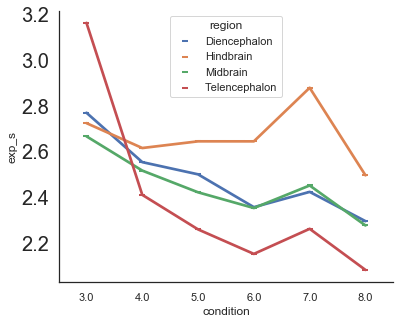

In [255]:
data_name = 'exp_s'
dic = xs_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, hue = 'region', data = dic, join=True, ci=0, scale=1, markers = '_')

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

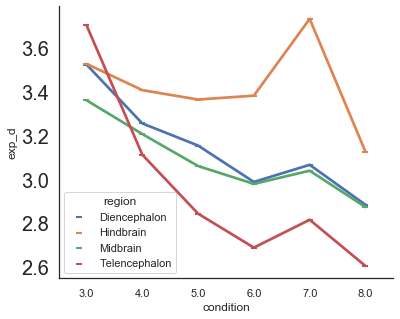

In [257]:
data_name = 'exp_d'
dic = xd_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, hue = 'region', data = dic, join=True, ci=0, scale=1, markers = '_')

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [6]:
d3 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*3dpf*n_LLR*')
d4 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*4dpf*n_LLR*')
d5 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*5dpf*n_LLR*')
d6 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*6dpf*n_LLR*')
d7 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*7dpf*n_LLR*')
d8 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*8dpf*n_LLR*')
data_ll = np.hstack((d3, d4, d5, d6, d7, d8))
data_ll[:10]

array(['BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_Diencephalon_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_Hindbrain_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_Midbrain_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_Telencephalon_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-05_2photon_sess-01-3dpf_BLNGR_run-01_Diencephalon_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-05_2photon_sess-01-3dpf_BLNGR_run-01_Hindbrain_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-05_2photon_sess-01-3dpf_BLNGR_run-01_Midbrain_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-05_2photon_sess-01-3dpf_BLNGR_run-01_Telencephalon_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-06_2photon_sess-01-3dpf_BLNGR_run-01_Diencephalon_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-06_2photon_sess-01-3dpf_BLNGR_run-01_Hindbrain_LLR_allstot.npy'],
      dtype='<U82')

In [7]:
choose = 0
llr_l = np.zeros(len(data_ll))
for i in range(len(data_ll)):
    llr_l[i] = np.load(data_ll[i])[choose][0]
    
reg_list = ['Diencephalon', 'Hindbrain', 'Midbrain', 'Telencephalon']


choose = 0
llr_l = np.zeros(len(data_ll))
for i in range(len(data_ll)):
    llr_l[i] = np.load(data_ll[i])[choose][0]


len_list = []
seq_l = d3, d4, d5, d6, d7, d8
for i in range(len(seq_l)):
    count = 0
    for e in range(len(seq_l[i])):
        count+=1

    len_list = np.append(len_list, count)
cond = np.arange(3, 9)
cond_l = []
for i in range(len(len_list)):
    for e in range(int(len_list[i])):
        cond_l = np.append(cond_l, cond[i])
        
reg_data = np.ravel(adfn.repeat_list(reg_list, 30))
        
df = pd.DataFrame({'llr':llr_l , "condition": cond_l, "region": reg_data})

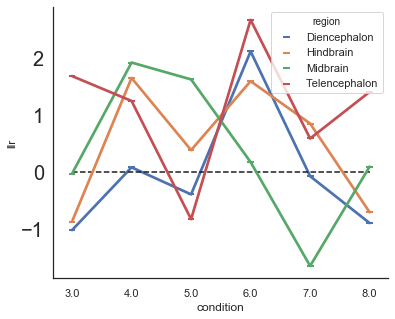

In [8]:
data_name = 'llr'
dic = df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, hue = 'region', data = dic, join=True, ci=0, scale=1, markers = '_')

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.hlines(0, 0,5, linestyles='--')


plt.show()

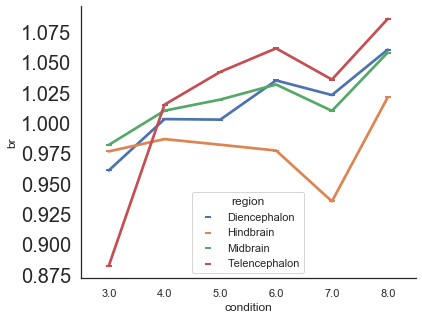

In [259]:
data_name = 'br'
dic = br_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, hue = 'region', data = dic, join=True, ci=0, scale=1, markers = '_')

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [9]:
# Create lists of coord data
#---------------------------------------------------------------------------

d3 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*3dpf*n_BR*raw*')
d4 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*4dpf*n_BR*raw*')
d5 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*5dpf**n_BR*raw*')
d6 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*6dpf*n_BR*raw*')
d7 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*7dpf*n_BR*raw*')
d8 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*8dpf*n_BR*raw*')
data_ll = np.hstack((d3, d4, d5, d6, d7, d8))


In [10]:
#BR use MRE method

br_l = np.zeros(len(data_ll))
for i in range(len(data_ll)):
    br_l[i] = np.load(data_ll[i])


len_list = []
seq_l = d3, d4, d5, d6, d7, d8
for i in range(len(seq_l)):
    count = 0
    for e in range(len(seq_l[i])):
        count+=1

    len_list = np.append(len_list, count)
cond = np.arange(3, 9)
cond_l = []
for i in range(len(len_list)):
    for e in range(int(len_list[i])):
        cond_l = np.append(cond_l, cond[i])
        
reg_data = np.ravel(adfn.repeat_list(reg_list, 30))
        
df = pd.DataFrame({'br':br_l , "condition": cond_l, "region": reg_data})

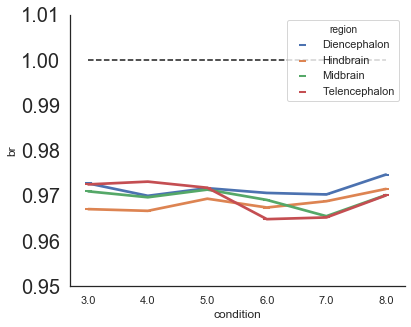

In [11]:
data_name = 'br'
dic = df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, hue = 'region', data = dic, join=True, ci=0, scale=1, markers = '_')

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.hlines(1, 0,5, linestyles='--')
plt.ylim(0.95, 1.01)
plt.show()

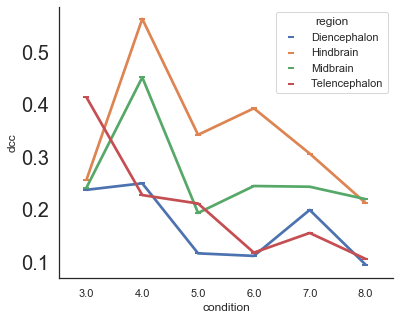

In [260]:
data_name = 'dcc'
dic = dcc_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, hue = 'region', data = dic, join=True, ci=0, scale=1, markers = '_')

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

# Telencephalon

In [151]:
d3 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*3dpf*crit*')
d3

['BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_Diencephalon_criticality.npy',
 'BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_Hindbrain_criticality.npy',
 'BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_Midbrain_criticality.npy',
 'BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_Telencephalon_criticality.npy',
 'BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_all_criticality.npy',
 'BLNDEV-WILDTYPE-05_2photon_sess-01-3dpf_BLNGR_run-01_Diencephalon_criticality.npy',
 'BLNDEV-WILDTYPE-05_2photon_sess-01-3dpf_BLNGR_run-01_Hindbrain_criticality.npy',
 'BLNDEV-WILDTYPE-05_2photon_sess-01-3dpf_BLNGR_run-01_Midbrain_criticality.npy',
 'BLNDEV-WILDTYPE-05_2photon_sess-01-3dpf_BLNGR_run-01_Telencephalon_criticality.npy',
 'BLNDEV-WILDTYPE-05_2photon_sess-01-3dpf_BLNGR_run-01_all_criticality.npy',
 'BLNDEV-WILDTYPE-06_2photon_sess-01-3dpf_BLNGR_run-01_Diencephalon_criticality.npy',
 'BLNDEV-WILDTYPE-06_2photon_sess-01-3dpf_BLNGR_run-01_Hindbrain_criticality.npy',
 

In [138]:
d3 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*3dpf*Tel*crit*')
d4 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*4dpf*Tel*crit*')
d5 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*5dpf*Tel*crit*')
d6 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*6dpf*Tel*crit*')
d7 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*7dpf*Tel*crit*')
d8 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*8dpf*Tel*crit*')
data_ll = d3, d4, d5, d6, d7, d8

In [48]:
for i in range(len(data_ll)):
    for e in range(len(data_ll[i])):
        data = np.load(data_ll[i][e], allow_pickle=True).item()
        av = data['av']
        
        print(data_ll[i][e])
        print(np.max(av[0]), np.max(av[1])/2.73)

BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_Telencephalon_criticality.npy
8 1.465201465201465
BLNDEV-WILDTYPE-05_2photon_sess-01-3dpf_BLNGR_run-01_Telencephalon_criticality.npy
76 6.227106227106227
BLNDEV-WILDTYPE-06_2photon_sess-01-3dpf_BLNGR_run-01_Telencephalon_criticality.npy
728 16.483516483516485
BLNDEV-WILDTYPE-07_2photon_sess-01-3dpf_BLNGR_run-01_Telencephalon_criticality.npy
41 2.197802197802198
BLNDEV-WILDTYPE-08_2photon_sess-01-3dpf_BLNGR_run-01_Telencephalon_criticality.npy
42 3.663003663003663
BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01_Telencephalon_criticality.npy
128 7.6923076923076925
BLNDEV-WILDTYPE-02_2photon_sess-01-4dpf_BLNGR_run-01_Telencephalon_criticality.npy
67 4.029304029304029
BLNDEV-WILDTYPE-03_2photon_sess-01-4dpf_BLNGR_run-01_Telencephalon_criticality.npy
674 10.256410256410257
BLNDEV-WILDTYPE-04_2photon_sess-01-4dpf_BLNGR_run-01_Telencephalon_criticality.npy
5604 63.36996336996337
BLNDEV-WILDTYPE-05_2photon_sess-01-4dpf_BLNGR_run-01_Tele

In [137]:
name_list = ['br', 'dcc', 'exp_s', 'exp_d']
obj, len_list = load(data_ll, name_list)
br_df = sort('br', obj)
dcc_df = sort('dcc', obj)
xs_df = sort('exp_s', obj)
xd_df = sort('exp_d', obj)

0
1
2
3
4
5


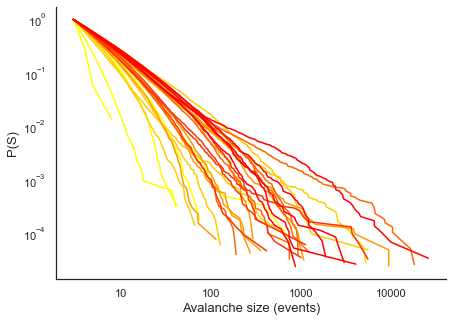

In [37]:
import matplotlib
from matplotlib import cm
import powerlaw
colors  = cm.autumn_r(np.linspace(0,1,len(data_ll)))
choose=0

fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    for e in range(len(data_ll[i])):
        data = np.load(data_ll[i][e], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

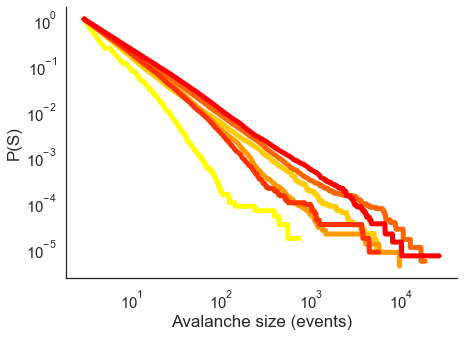

In [38]:
colors  = cm.autumn_r(np.linspace(0,1,len(data_ll)))
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    yaxis, xaxis = crfn.mean_av(data_ll[i], 1000, 'size')
    hist = plt.plot(yaxis, xaxis, c = colors[i], linewidth = 5)

axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 15)
plt.xticks(size = 15)
#plt.savefig(Ffig + 'avsize_ptz_mean.svg', transparent = True)
plt.show()

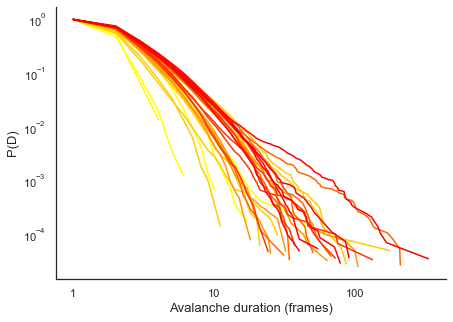

In [94]:
import matplotlib
from matplotlib import cm
import powerlaw
colors  = cm.autumn_r(np.linspace(0,1,len(data_ll)))
choose=1
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    for e in range(len(data_ll[i])):
        data = np.load(data_ll[i][e], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(D)', size = '13')
axarr.set_xlabel('Avalanche duration (frames)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

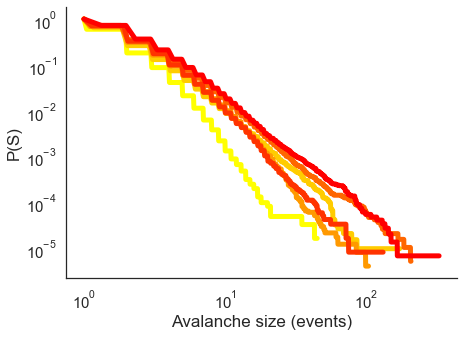

In [44]:
colors  = cm.autumn_r(np.linspace(0,1,len(data_ll)))
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    yaxis, xaxis = crfn.mean_av(data_ll[i], 1000, 'dur')
    hist = plt.plot(yaxis, xaxis, c = colors[i], linewidth = 5)

axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 15)
plt.xticks(size = 15)
#plt.savefig(Ffig + 'avsize_ptz_mean.svg', transparent = True)
plt.show()

In [ ]:
#Calculate LLR

import powerlaw
def do(avdistcut, typ):
    results = powerlaw.Fit(avdistcut, discrete=True)
    print(results.power_law.alpha)
    print(results.power_law.xmin)
    R, p = results.distribution_compare(typ, 'lognormal', normalized_ratio=True)
    return(R,p)

out_l = list(range(len(data_ll)))
for i in range(14,len(data_ll)):
    out = list(range(2))
    for choose in [0,1]:
        data = np.load(data_ll[i], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        if np.max(avdistcut)<11:
            typ = 'power_law'
        else:
            typ = 'truncated_power_law'
        out[choose] = do(avdistcut, typ)
    out_l[i] = out
    prename = data_ll[i]
    name = prename[:prename.find('crit')]
    np.save(Fdata + 'BLNDEV-WILDTYPE/' + name + 'LLR_allstot.npy', out)
    print(i)

In [3]:
# Create lists of coord data
#---------------------------------------------------------------------------

d3 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*3dpf*Te*LLR*')
d4 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*4dpf*Te*LLR*')
d5 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*5dpf*Te*LLR*')
d6 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*6dpf*Te*LLR*')
d7 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*7dpf*Te*LLR*')
d8 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*8dpf*Te*LLR*')
data_ll = np.hstack((d3, d4, d5, d6, d7, d8))
data_ll

array(['BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_Telencephalon_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-05_2photon_sess-01-3dpf_BLNGR_run-01_Telencephalon_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-06_2photon_sess-01-3dpf_BLNGR_run-01_Telencephalon_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-07_2photon_sess-01-3dpf_BLNGR_run-01_Telencephalon_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-08_2photon_sess-01-3dpf_BLNGR_run-01_Telencephalon_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01_Telencephalon_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-02_2photon_sess-01-4dpf_BLNGR_run-01_Telencephalon_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-03_2photon_sess-01-4dpf_BLNGR_run-01_Telencephalon_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-04_2photon_sess-01-4dpf_BLNGR_run-01_Telencephalon_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-05_2photon_sess-01-4dpf_BLNGR_run-01_Telencephalon_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01_Telenceph

In [4]:
choose = 1
llr_l = np.zeros(len(data_ll))
for i in range(len(data_ll)):
    llr_l[i] = np.load(data_ll[i])[choose][0]


len_list = []
seq_l = d3, d4, d5, d6, d7, d8
for i in range(len(seq_l)):
    count = 0
    for e in range(len(seq_l[i])):
        count+=1

    len_list = np.append(len_list, count)
cond = np.arange(3, 9)
cond_l = []
for i in range(len(len_list)):
    for e in range(int(len_list[i])):
        cond_l = np.append(cond_l, cond[i])
        
df = pd.DataFrame({'llr':llr_l , "condition": cond_l})

/Users/dominicburrows/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


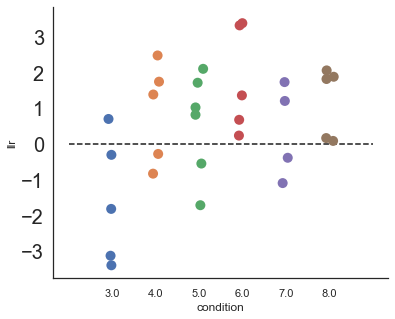

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
    
data_name = 'llr'
dic = df

fig, ax = plt.subplots(figsize = (6,5))
#ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)
plt.hlines(0, -1,6, linestyles='--')
plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


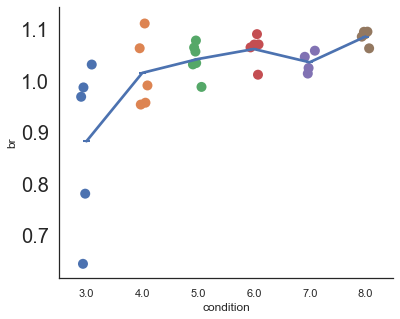

In [111]:
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
    
data_name = 'br'
dic = br_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


In [112]:
from scipy import stats
stats.spearmanr(dic['br'], dic['condition'])

SpearmanrResult(correlation=0.6150639669760826, pvalue=0.000298085372196457)

In [113]:
from scipy import stats
stats.spearmanr(np.append(dic['br'][1:3], dic['br'][4:]), np.append(dic['condition'][1:3], dic['condition'][4:]))

SpearmanrResult(correlation=0.534302114579305, pvalue=0.0034025301256914993)

In [97]:
from scipy import stats
stats.spearmanr(dic['br'][5:], dic['condition'][5:])

SpearmanrResult(correlation=0.4146120970224812, pvalue=0.0393291313358788)

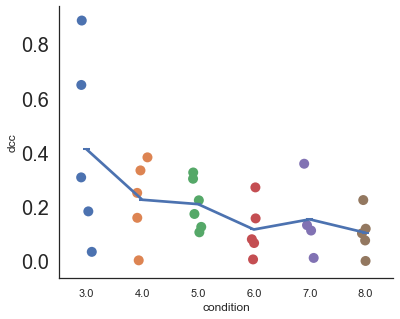

In [114]:
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
    
data_name = 'dcc'
dic = dcc_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


In [115]:
from scipy import stats
stats.spearmanr(dic['dcc'], dic['condition'])

SpearmanrResult(correlation=-0.44539114849992184, pvalue=0.013644057499422171)

In [116]:
from scipy import stats
stats.spearmanr(np.append(dic['dcc'][1:3], dic['dcc'][4:]), np.append(dic['condition'][1:3], dic['condition'][4:]))

SpearmanrResult(correlation=-0.338141275841401, pvalue=0.07841457990949091)

In [56]:
from scipy import stats
stats.spearmanr(dic['dcc'][5:], dic['condition'][5:])

SpearmanrResult(correlation=-0.3981218431636325, pvalue=0.048718338188739024)

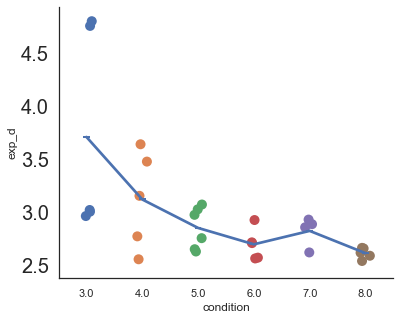

In [58]:
data_name = 'exp_d'
dic = xd_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [59]:
from scipy import stats
stats.spearmanr(dic['exp_d'], dic['condition'])

SpearmanrResult(correlation=-0.6441700754646793, pvalue=0.00012234503100635134)

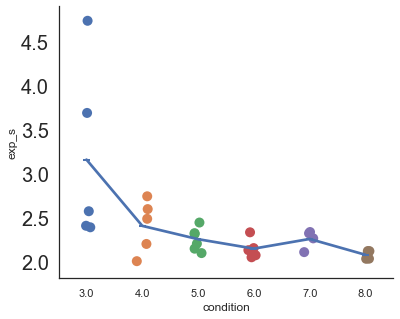

In [60]:
data_name = 'exp_s'
dic = xs_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [61]:
from scipy import stats
stats.spearmanr(dic['exp_s'], dic['condition'])

SpearmanrResult(correlation=-0.6592872015789116, pvalue=7.422090682505358e-05)

# Tectum

In [139]:
d3 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*3dpf*Mid*crit*')
d4 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*4dpf*Mid*crit*')
d5 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*5dpf*Mid*crit*')
d6 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*6dpf*Mid*crit*')
d7 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*7dpf*Mid*crit*')
d8 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*8dpf*Mid*crit*')
data_ll = d3, d4, d5, d6, d7, d8

In [140]:
name_list = ['br', 'dcc', 'exp_s', 'exp_d']
obj, len_list = load(data_ll, name_list)
br_df = sort('br', obj)
dcc_df = sort('dcc', obj)
xs_df = sort('exp_s', obj)
xd_df = sort('exp_d', obj)

0
1
2
3
4
5


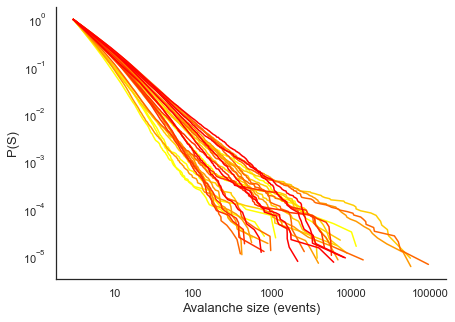

In [74]:
import matplotlib
from matplotlib import cm
import powerlaw
colors  = cm.autumn_r(np.linspace(0,1,len(data_ll)))
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    for e in range(len(data_ll[i])):
        data = np.load(data_ll[i][e], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


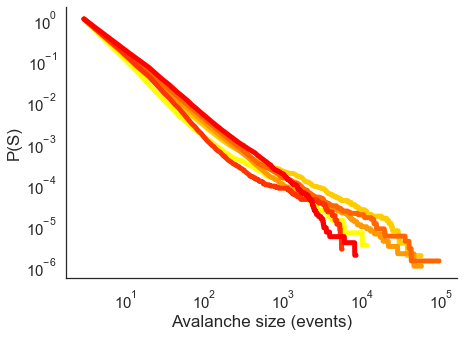

In [75]:
colors  = cm.autumn_r(np.linspace(0,1,len(data_ll)))
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    yaxis, xaxis = crfn.mean_av(data_ll[i], 1000, 'size')
    hist = plt.plot(yaxis, xaxis, c = colors[i], linewidth = 5)

axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 15)
plt.xticks(size = 15)
#plt.savefig(Ffig + 'avsize_ptz_mean.svg', transparent = True)
plt.show()

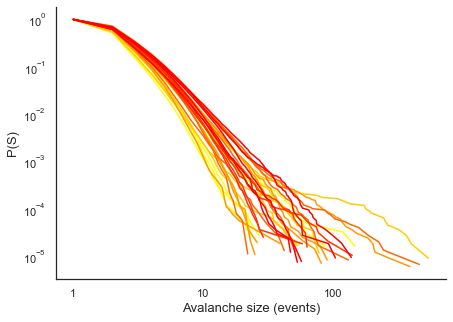

In [76]:
import matplotlib
from matplotlib import cm
import powerlaw
colors  = cm.autumn_r(np.linspace(0,1,len(data_ll)))
choose=1
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    for e in range(len(data_ll[i])):
        data = np.load(data_ll[i][e], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


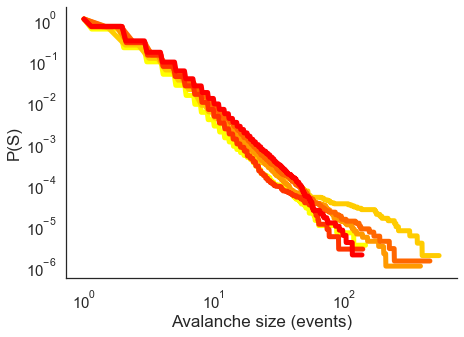

In [77]:
colors  = cm.autumn_r(np.linspace(0,1,len(data_ll)))
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    yaxis, xaxis = crfn.mean_av(data_ll[i], 1000, 'dur')
    hist = plt.plot(yaxis, xaxis, c = colors[i], linewidth = 5)

axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 15)
plt.xticks(size = 15)
#plt.savefig(Ffig + 'avsize_ptz_mean.svg', transparent = True)
plt.show()

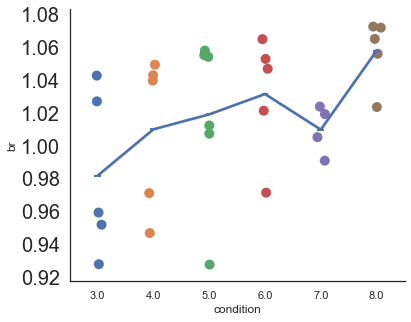

In [78]:
data_name = 'br'
dic = br_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [79]:
from scipy import stats
stats.spearmanr(dic['br'], dic['condition'])

SpearmanrResult(correlation=0.44719617848371074, pvalue=0.013223230200960032)

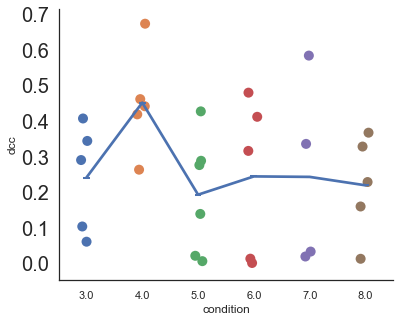

In [80]:
data_name = 'dcc'
dic = dcc_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [81]:
from scipy import stats
stats.spearmanr(dic['dcc'], dic['condition'])

SpearmanrResult(correlation=-0.19562012449312677, pvalue=0.30021167612203564)

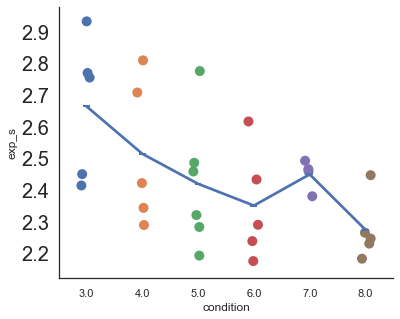

In [82]:
data_name = 'exp_s'
dic = xs_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [83]:
from scipy import stats
stats.spearmanr(dic['exp_s'], dic['condition'])

SpearmanrResult(correlation=-0.46592336456552114, pvalue=0.009460842089336332)

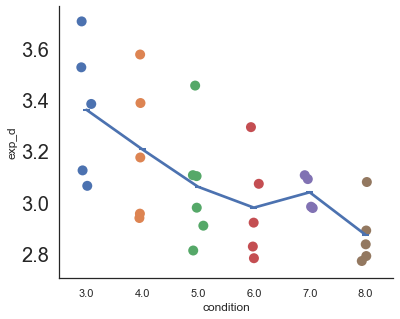

In [84]:
data_name = 'exp_d'
dic = xd_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [85]:
from scipy import stats
stats.spearmanr(dic['exp_d'], dic['condition'])

SpearmanrResult(correlation=-0.5837015710077497, pvalue=0.0007090881262309532)

# Diencephalon

In [141]:
d3 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*3dpf*Di*crit*')
d4 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*4dpf*Di*crit*')
d5 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*5dpf*Di*crit*')
d6 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*6dpf*Di*crit*')
d7 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*7dpf*Di*crit*')
d8 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*8dpf*Di*crit*')
data_ll = d3, d4, d5, d6, d7, d8


In [142]:
name_list = ['br', 'dcc', 'exp_s', 'exp_d']
obj, len_list = load(data_ll, name_list)
br_df = sort('br', obj)
dcc_df = sort('dcc', obj)
xs_df = sort('exp_s', obj)
xd_df = sort('exp_d', obj)

0
1
2
3
4
5


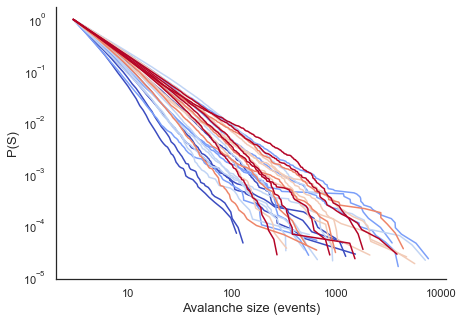

In [569]:

import matplotlib
from matplotlib import cm
import powerlaw
colors  = cm.coolwarm(np.linspace(0,1,len(data_ll)))
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    for e in range(len(data_ll[i])):
        data = np.load(data_ll[i][e], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


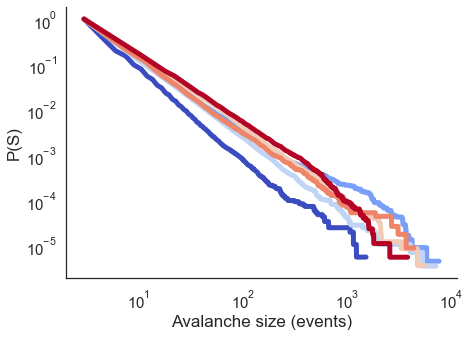

In [570]:
colors  = cm.coolwarm(np.linspace(0,1,len(data_ll)))
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    yaxis, xaxis = crfn.mean_av(data_ll[i], 1000, 'size')
    hist = plt.plot(yaxis, xaxis, c = colors[i], linewidth = 5)

axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 15)
plt.xticks(size = 15)
#plt.savefig(Ffig + 'avsize_ptz_mean.svg', transparent = True)
plt.show()

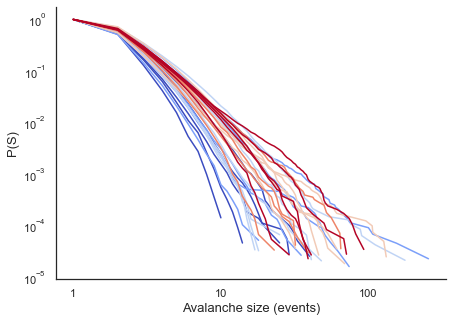

In [571]:

import matplotlib
from matplotlib import cm
import powerlaw
colors  = cm.coolwarm(np.linspace(0,1,len(data_ll)))
choose=1
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    for e in range(len(data_ll[i])):
        data = np.load(data_ll[i][e], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


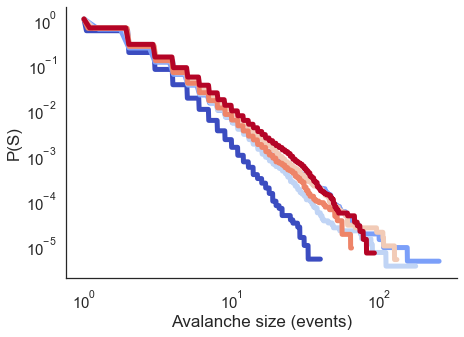

In [573]:
colors  = cm.coolwarm(np.linspace(0,1,len(data_ll)))
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    yaxis, xaxis = crfn.mean_av(data_ll[i], 1000, 'dur')
    hist = plt.plot(yaxis, xaxis, c = colors[i], linewidth = 5)

axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 15)
plt.xticks(size = 15)
#plt.savefig(Ffig + 'avsize_ptz_mean.svg', transparent = True)
plt.show()

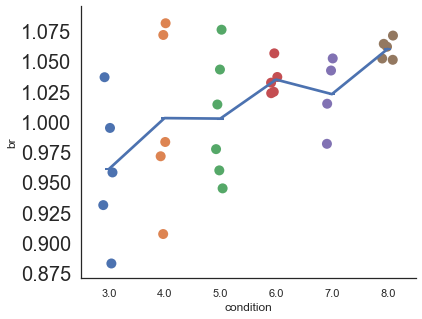

In [577]:
data_name = 'br'
dic = br_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

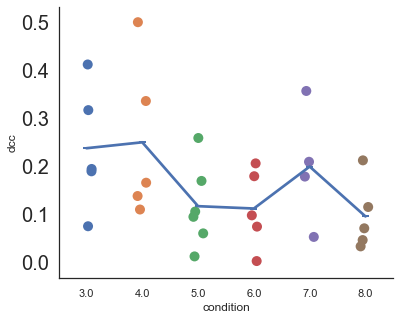

In [578]:
data_name = 'dcc'
dic = dcc_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

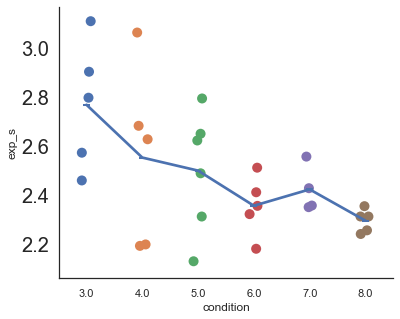

In [579]:
data_name = 'exp_s'
dic = xs_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

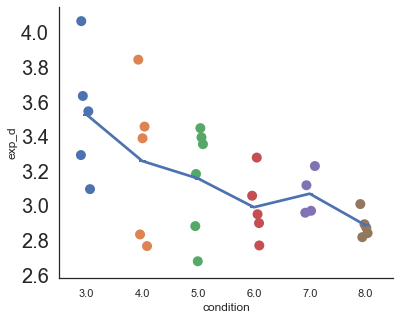

In [581]:
data_name = 'exp_d'
dic = xd_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

# Hindbrain

In [126]:
d3 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*3dpf*Hi*crit*')
d4 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*4dpf*Hi*crit*')
d5 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*5dpf*Hi*crit*')
d6 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*6dpf*Hi*crit*')
d7 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*7dpf*Hi*crit*')
d8 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*8dpf*Hi*crit*')
data_ll = d3, d4, d5, d6, d7, d8

In [143]:
name_list = ['br', 'dcc', 'exp_s', 'exp_d']
obj, len_list = load(data_ll, name_list)
br_df = sort('br', obj)
dcc_df = sort('dcc', obj)
xs_df = sort('exp_s', obj)
xd_df = sort('exp_d', obj)

0
1
2
3
4
5


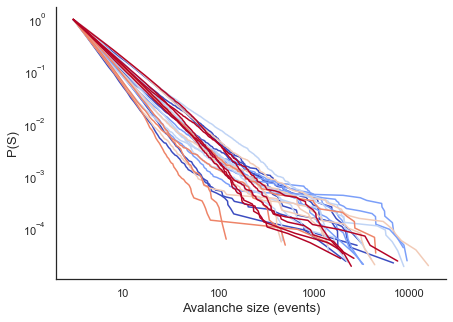

In [600]:

import matplotlib
from matplotlib import cm
import powerlaw
colors  = cm.coolwarm(np.linspace(0,1,len(data_ll)))
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    for e in range(len(data_ll[i])):
        data = np.load(data_ll[i][e], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


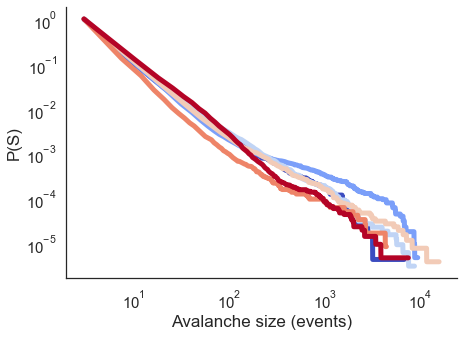

In [601]:
colors  = cm.coolwarm(np.linspace(0,1,len(data_ll)))
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    yaxis, xaxis = crfn.mean_av(data_ll[i], 1000, 'size')
    hist = plt.plot(yaxis, xaxis, c = colors[i], linewidth = 5)

axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 15)
plt.xticks(size = 15)
#plt.savefig(Ffig + 'avsize_ptz_mean.svg', transparent = True)
plt.show()

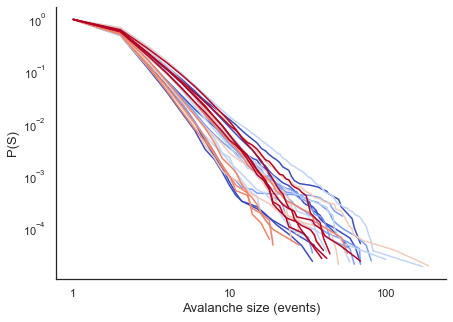

In [598]:

import matplotlib
from matplotlib import cm
import powerlaw
colors  = cm.coolwarm(np.linspace(0,1,len(data_ll)))
choose=1
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    for e in range(len(data_ll[i])):
        data = np.load(data_ll[i][e], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


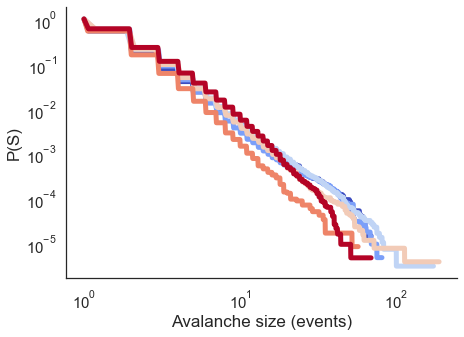

In [599]:
colors  = cm.coolwarm(np.linspace(0,1,len(data_ll)))
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    yaxis, xaxis = crfn.mean_av(data_ll[i], 1000, 'dur')
    hist = plt.plot(yaxis, xaxis, c = colors[i], linewidth = 5)

axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 15)
plt.xticks(size = 15)
#plt.savefig(Ffig + 'avsize_ptz_mean.svg', transparent = True)
plt.show()

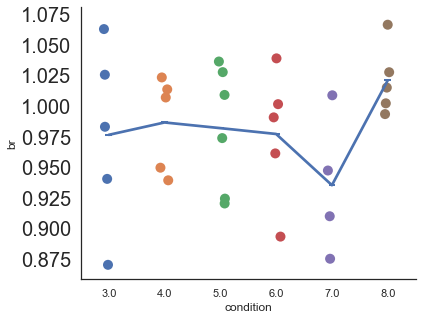

In [603]:
data_name = 'br'
dic = br_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

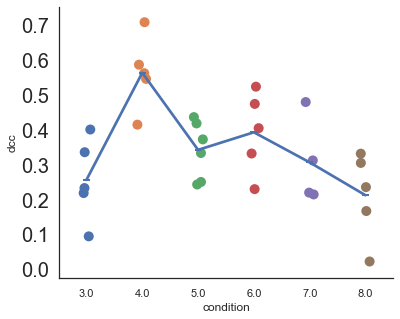

In [610]:
data_name = 'dcc'
dic = dcc_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

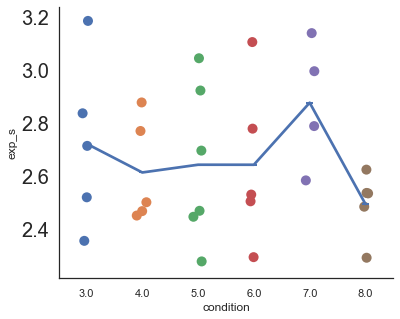

In [608]:
data_name = 'exp_s'
dic = xs_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

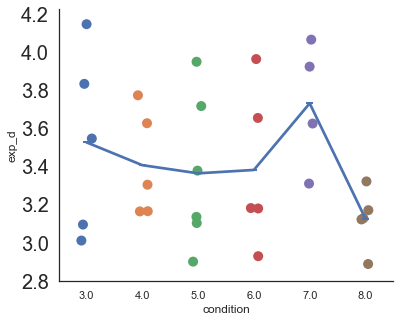

In [609]:
data_name = 'exp_d'
dic = xd_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

# Environmental enrichment - Tectal data

In [51]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'TECTUMSPONT-WILDTYPE'
savepath = F10t + 'Project/' + experiment + os.sep 
os.chdir(F10t + 'Project/' + experiment)
NR_3_bin = sorted(glob.glob('*NR*3dpf*spikes.dat*')) 
NR_5_bin = sorted(glob.glob('*NR*5dpf*spikes.dat*')) 
NR_7_bin = sorted(glob.glob('*NR*7dpf*spikes.dat*')) 

GR_3_bin = sorted(glob.glob('*GR*3dpf*spikes.dat*')) 
GR_5_bin = sorted(glob.glob('*GR*5dpf*spikes.dat*')) 
GR_7_bin = sorted(glob.glob('*GR*7dpf*spikes.dat*')) 

NR_3_coord = sorted(glob.glob('*NR*3dpf*cent*')) 
NR_5_coord = sorted(glob.glob('*NR*5dpf*cent*')) 
NR_7_coord = sorted(glob.glob('*NR*7dpf*cent*')) 

GR_3_coord = sorted(glob.glob('*GR*3dpf*cent*')) 
GR_5_coord = sorted(glob.glob('*GR*5dpf*cent*')) 
GR_7_coord = sorted(glob.glob('*GR*7dpf*cent*')) 

bin_list = NR_3_bin, NR_5_bin, NR_7_bin, GR_3_bin, GR_5_bin, GR_7_bin
coord_list = NR_3_coord, NR_5_coord, NR_7_coord, GR_3_coord, GR_5_coord, GR_7_coord

In [ ]:
#nnb
#-------
for i in range(len(coord_list)):
    for e in range(len(coord_list[i])):
        coord = np.loadtxt(coord_list[i][e])
        nnb = crfn.neighbour_new(coord, 50, [.8, .8, 5])
        np.save(savepath + coord_list[i][e][:coord_list[i][e].find('all_cells')+10] + 'nnb.npy', nnb)
        print('Done ' + coord_list[i][e])

In [71]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'TECTUMSPONT-WILDTYPE'
savepath = F10t + 'Project/' + experiment + os.sep 
os.chdir(F10t + 'Project/' + experiment)
NR_3_nnb = sorted(glob.glob('*NR*3dpf*nnb*')) 
NR_5_nnb = sorted(glob.glob('*NR*5dpf*nnb*')) 
NR_7_nnb = sorted(glob.glob('*NR*7dpf*nnb*')) 

GR_3_nnb = sorted(glob.glob('*GR*3dpf*nnb*')) 
GR_5_nnb = sorted(glob.glob('*GR*5dpf*nnb*')) 
GR_7_nnb = sorted(glob.glob('*GR*7dpf*nnb*')) 
nnb_list = NR_3_nnb, NR_5_nnb, NR_7_nnb, GR_3_nnb, GR_5_nnb, GR_7_nnb

In [90]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'TECTUMSPONT-WILDTYPE'
savepath = F10t + 'Project/' + experiment + os.sep 
os.chdir(F10t + 'Project/' + experiment)
NR_3_pkg = sorted(glob.glob('*NR*3dpf*pkg*')) 
NR_5_pkg = sorted(glob.glob('*NR*5dpf*pkg*')) 
NR_7_pkg = sorted(glob.glob('*NR*7dpf*pkg*')) 

GR_3_pkg = sorted(glob.glob('*GR*3dpf*pkg*')) 
GR_5_pkg = sorted(glob.glob('*GR*5dpf*pkg*')) 
GR_7_pkg = sorted(glob.glob('*GR*7dpf*pkg*')) 
NR_3_av = sorted(glob.glob('*NR*3dpf*av*')) 
NR_5_av = sorted(glob.glob('*NR*5dpf*av*')) 
NR_7_av = sorted(glob.glob('*NR*7dpf*av*')) 

GR_3_av = sorted(glob.glob('*GR*3dpf*av*')) 
GR_5_av = sorted(glob.glob('*GR*5dpf*av*')) 
GR_7_av = sorted(glob.glob('*GR*7dpf*av*')) 
NR_list = NR_3_av, NR_5_av, NR_7_av
GR_list = GR_3_av, GR_5_av, GR_7_av
NR_list, GR_list

((['180209_WT_NR_h2b_gc6s_3dpf_f1_sa_aligned_all_cells_av.npy',
   '180219_WT_NR_h2b_gc6s_3dpf_f2_sa_aligned_all_cells_av.npy',
   '180219_WT_NR_h2b_gc6s_3dpf_f4_sa_aligned_all_cells_av.npy',
   '180319_WT_NR_h2b_gc6s_3dpf_f2_sa_aligned_all_cells_av.npy',
   '180625_WT_NR_h2b_gc6s_3dpf_f1_sa_aligned_all_cells_av.npy',
   '180625_WT_NR_h2b_gc6s_3dpf_f3_sa_aligned_all_cells_av.npy'],
  ['180129_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_av.npy',
   '180129_WT_NR_h2b_gc6s_5dpf_f3_sa_aligned_all_cells_av.npy',
   '180321_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_av.npy',
   '180321_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_av.npy',
   '180328_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_av.npy',
   '180717_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_av.npy',
   '180717_WT_NR_h2b_gc6s_5dpf_f3_sa_aligned_all_cells_av.npy',
   '180718_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_av.npy'],
  ['180220_WT_NR_h2b_gc6s_7dpf_f1_sa_aligned_all_cells_av.npy',
   '180220_WT_NR_h2b_gc6s_7dpf_f2_sa_a

In [ ]:
#av calculation
#----------------
for i in range(len(nnb_list)):
    for e in range(len(nnb_list[i])):
        nnb = np.load(nnb_list[i][e])
        bind = np.loadtxt(bin_list[i][e])
        av,pkg = crfn.avalanche_r(nnb, bind)
        np.save(savepath + nnb_list[i][e][:nnb_list[i][e].find('all_cells')+10] + 'av.npy', av)
        np.save(savepath + nnb_list[i][e][:nnb_list[i][e].find('all_cells')+10] + 'pkg.npy', pkg)
        print('Done ' + nnb_list[i][e])

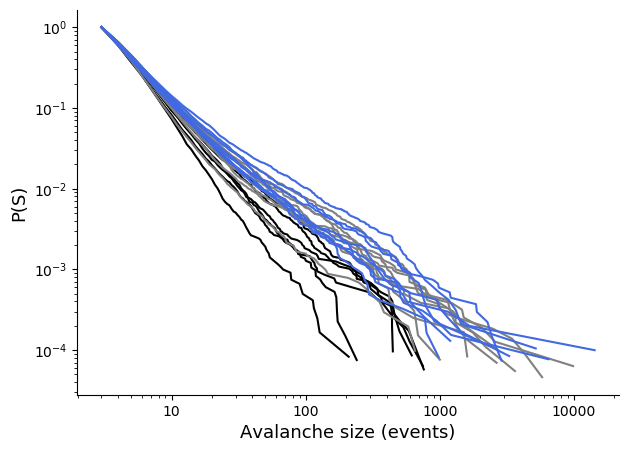

In [107]:
import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'grey','royalblue']
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(NR_list)):
    for e in range(len(NR_list[i])):
        avdistcut = np.load(NR_list[i][e])[choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

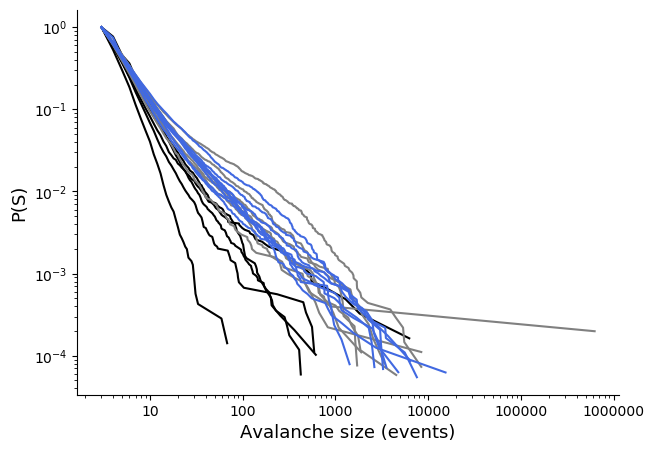

In [108]:
import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'grey','royalblue']
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(GR_list)):
    for e in range(len(GR_list[i])):
        avdistcut = np.load(GR_list[i][e])[choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

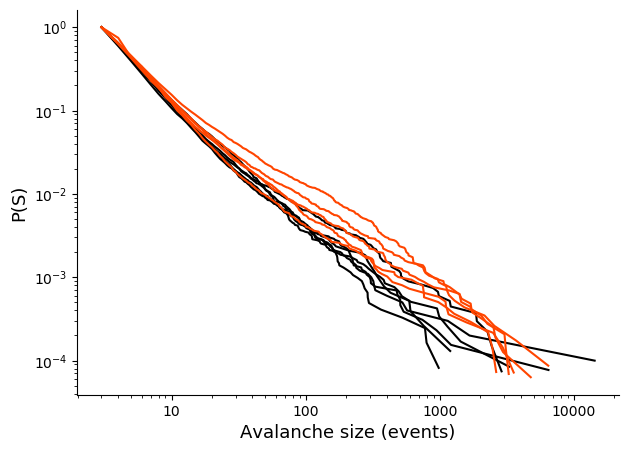

In [120]:
#3dpf comparison

import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
choose=0
index = 0
fig, axarr = plt.subplots(figsize = (7,5))


for e in range(len(NR_list[index])):
    avdistcut = np.load(NR_list[i][e])[choose]
    powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = 'black')

for e in range(len(GR_list[index])):
    avdistcut = np.load(GR_list[i][e])[choose]
    powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = 'orangered')

axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

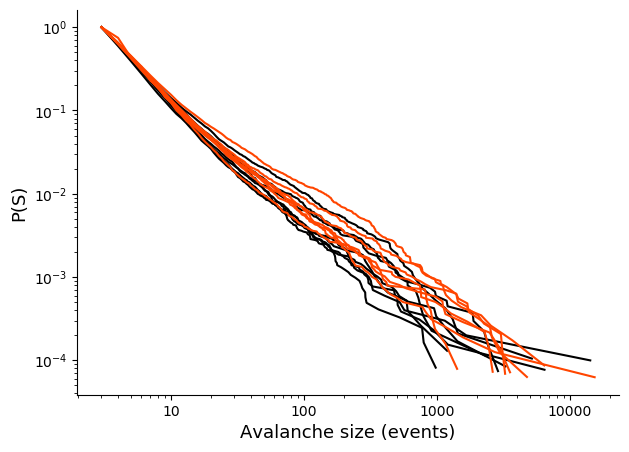

In [119]:
#5dpf comparison

import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
choose=0
index = 1
fig, axarr = plt.subplots(figsize = (7,5))


for e in range(len(NR_list[index])):
    avdistcut = np.load(NR_list[i][e])[choose]
    powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = 'black')

for e in range(len(GR_list[index])):
    avdistcut = np.load(GR_list[i][e])[choose]
    powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = 'orangered')

axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

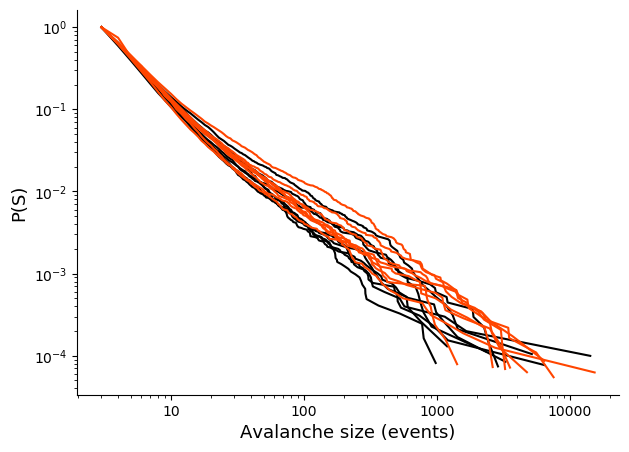

In [118]:
#7dpf comparison

import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
choose=0
index = 2
fig, axarr = plt.subplots(figsize = (7,5))


for e in range(len(NR_list[index])):
    avdistcut = np.load(NR_list[i][e])[choose]
    powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = 'black')

for e in range(len(GR_list[index])):
    avdistcut = np.load(GR_list[i][e])[choose]
    powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = 'orangered')

axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [179]:
np.load(av_list[i][e])

array([[245,   4,  32, ...,   8,   5,   3],
       [ 13,   2,   7, ...,   3,   2,   1]])

In [181]:
for i in range(len(av_list)):
    for e in range(len(av_list[i])):
        curr_av = np.load(av_list[i][e])
        dcc = crfn.DCC(curr_av)
        np.save(savepath + av_list[i][e][:av_list[i][e].find('all_cells')+10] + 'dcc.npy', dcc)
        print('Done ' + av_list[i][e])

Done 180209_WT_NR_h2b_gc6s_3dpf_f1_sa_aligned_all_cells_av.npy
Done 180219_WT_NR_h2b_gc6s_3dpf_f2_sa_aligned_all_cells_av.npy
Done 180219_WT_NR_h2b_gc6s_3dpf_f4_sa_aligned_all_cells_av.npy
Done 180319_WT_NR_h2b_gc6s_3dpf_f2_sa_aligned_all_cells_av.npy
Done 180625_WT_NR_h2b_gc6s_3dpf_f1_sa_aligned_all_cells_av.npy
Done 180625_WT_NR_h2b_gc6s_3dpf_f3_sa_aligned_all_cells_av.npy
Done 180129_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_av.npy
Done 180129_WT_NR_h2b_gc6s_5dpf_f3_sa_aligned_all_cells_av.npy
Done 180321_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_av.npy
Done 180321_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_av.npy
Done 180328_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_av.npy
Done 180717_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_av.npy
Done 180717_WT_NR_h2b_gc6s_5dpf_f3_sa_aligned_all_cells_av.npy
Done 180718_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_av.npy
Done 180220_WT_NR_h2b_gc6s_7dpf_f1_sa_aligned_all_cells_av.npy
Done 180220_WT_NR_h2b_gc6s_7dpf_f2_sa_aligned_all_cells

In [182]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'TECTUMSPONT-WILDTYPE'
savepath = F10t + 'Project/' + experiment + os.sep 
os.chdir(F10t + 'Project/' + experiment)
NR_3_dcc = sorted(glob.glob('*NR*3dpf*dcc*')) 
NR_5_dcc = sorted(glob.glob('*NR*5dpf*dcc*')) 
NR_7_dcc = sorted(glob.glob('*NR*7dpf*dcc*')) 

GR_3_dcc = sorted(glob.glob('*GR*3dpf*dcc*')) 
GR_5_dcc = sorted(glob.glob('*GR*5dpf*dcc*')) 
GR_7_dcc = sorted(glob.glob('*GR*7dpf*dcc*')) 

NR_list = NR_3_dcc, NR_5_dcc, NR_7_dcc
GR_list = GR_3_dcc, GR_5_dcc, GR_7_dcc
NR_list, GR_list

((['180209_WT_NR_h2b_gc6s_3dpf_f1_sa_aligned_all_cells_dcc.npy',
   '180219_WT_NR_h2b_gc6s_3dpf_f2_sa_aligned_all_cells_dcc.npy',
   '180219_WT_NR_h2b_gc6s_3dpf_f4_sa_aligned_all_cells_dcc.npy',
   '180319_WT_NR_h2b_gc6s_3dpf_f2_sa_aligned_all_cells_dcc.npy',
   '180625_WT_NR_h2b_gc6s_3dpf_f1_sa_aligned_all_cells_dcc.npy',
   '180625_WT_NR_h2b_gc6s_3dpf_f3_sa_aligned_all_cells_dcc.npy'],
  ['180129_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_dcc.npy',
   '180129_WT_NR_h2b_gc6s_5dpf_f3_sa_aligned_all_cells_dcc.npy',
   '180321_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_dcc.npy',
   '180321_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_dcc.npy',
   '180328_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_dcc.npy',
   '180717_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_dcc.npy',
   '180717_WT_NR_h2b_gc6s_5dpf_f3_sa_aligned_all_cells_dcc.npy',
   '180718_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_dcc.npy'],
  ['180220_WT_NR_h2b_gc6s_7dpf_f1_sa_aligned_all_cells_dcc.npy',
   '180220_WT_NR_h2b_gc

In [196]:
np.load(NR_list[0][0])

array([0.1481087 , 2.82263298, 3.20916077])

In [210]:
#EXP - SIZE
import pandas as pd

exp_s = list(range(42))
age = list(range(42))
cond = list(range(42))

age_list = ['3dpf', '5dpf', '7dpf']
cond_list = ['NR', 'GR']
count=0
e_count = 0
list_list = NR_list, GR_list
for i in range(len(list_list)):
    for x in range(len(list_list[i])):
        for e in range(len(list_list[i][x])):
            exp_s[count] = np.load(list_list[i][x][e])[1]
            age[count] = age_list[x]
            cond[count] = cond_list[e_count]
            count+=1
    e_count+=1
exps_df = pd.DataFrame({"exponent":exp_s , "age":age, "condition": cond})

exp_d = list(range(42))
age = list(range(42))
cond = list(range(42))

age_list = ['3dpf', '5dpf', '7dpf']
cond_list = ['NR', 'GR']
count=0
e_count = 0
list_list = NR_list, GR_list
for i in range(len(list_list)):
    for x in range(len(list_list[i])):
        for e in range(len(list_list[i][x])):
            exp_d[count] = np.load(list_list[i][x][e])[2]
            age[count] = age_list[x]
            cond[count] = cond_list[e_count]
            count+=1
    e_count+=1
expd_df = pd.DataFrame({"exponent":exp_d , "age":age, "condition": cond})


dcc = list(range(42))
age = list(range(42))
cond = list(range(42))

age_list = ['3dpf', '5dpf', '7dpf']
cond_list = ['NR', 'GR']
count=0
e_count = 0
list_list = NR_list, GR_list
for i in range(len(list_list)):
    for x in range(len(list_list[i])):
        for e in range(len(list_list[i][x])):
            dcc[count] = np.load(list_list[i][x][e])[0]
            age[count] = age_list[x]
            cond[count] = cond_list[e_count]
            count+=1
    e_count+=1
dcc_df = pd.DataFrame({"dcc":dcc , "age":age, "condition": cond})

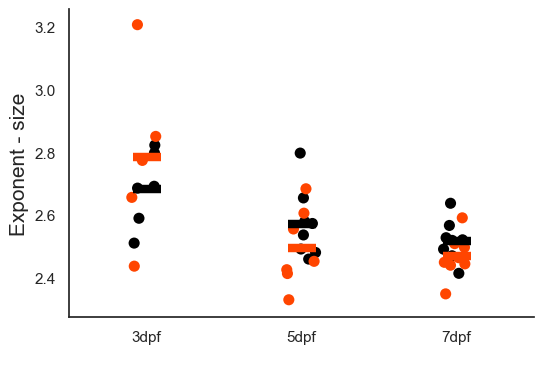

In [203]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
colors1  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
new_colors = np.vstack((colors1[0],np.vstack((colors1[2:4],colors1[5:]))))
colors = ['black', 'orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="age", y="exponent", data = exps_df, hue = 'condition', palette = colors, join=False, ci=2, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="age", y="exponent", data = exps_df, hue = 'condition', palette = colors, size = 8, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Exponent - size', size = '15')
ax.legend_.remove()
#plt.ylim(0.5,1.3)
plt.show()

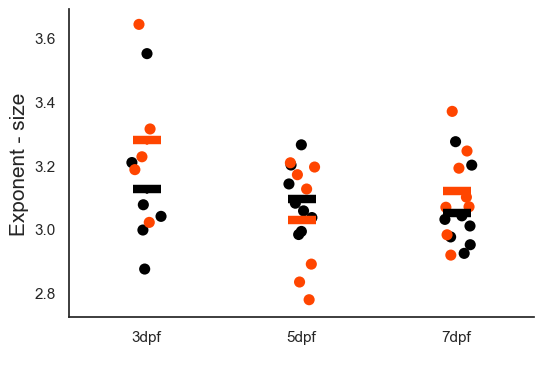

In [209]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
colors1  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
new_colors = np.vstack((colors1[0],np.vstack((colors1[2:4],colors1[5:]))))
colors = ['black', 'orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="age", y="exponent", data = expd_df, hue = 'condition', palette = colors, join=False, ci=2, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="age", y="exponent", data = expd_df, hue = 'condition', palette = colors, size = 8, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Exponent - dur', size = '15')
ax.legend_.remove()
#plt.ylim(0.5,1.3)
plt.show()

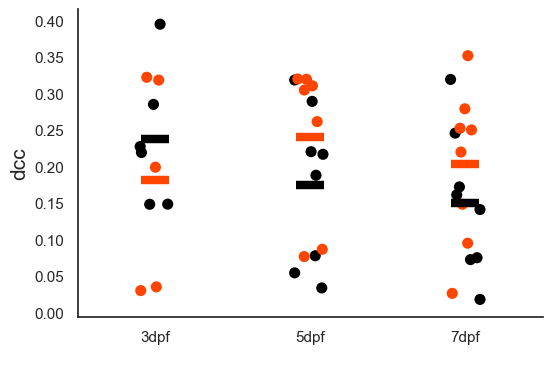

In [213]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
colors1  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
new_colors = np.vstack((colors1[0],np.vstack((colors1[2:4],colors1[5:]))))
colors = ['black', 'orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="age", y="dcc", data = dcc_df, hue = 'condition', palette = colors, join=False, ci=2, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="age", y="dcc", data = dcc_df, hue = 'condition', palette = colors, size = 8, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('dcc', size = '15')
ax.legend_.remove()
#plt.ylim(0.5,1.3)
plt.show()

In [ ]:
#BR 
#----------------
for i in range(len(pkg_list)):
    for e in range(len(pkg_list[i])):
        pkg = np.load(pkg_list[i][e])
        av = np.load(av_list[i][e])
        br = crfn.branch(pkg, av)
        np.save(savepath + pkg_list[i][e][:pkg_list[i][e].find('all_cells')+10] + 'br.npy', br)
        print('Done ' + _list[i][e])

In [125]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'TECTUMSPONT-WILDTYPE'
savepath = F10t + 'Project/' + experiment + os.sep 
os.chdir(F10t + 'Project/' + experiment)
NR_3_br = sorted(glob.glob('*NR*3dpf*br*')) 
NR_5_br = sorted(glob.glob('*NR*5dpf*br*')) 
NR_7_br = sorted(glob.glob('*NR*7dpf*br*')) 

GR_3_br = sorted(glob.glob('*GR*3dpf*br*')) 
GR_5_br = sorted(glob.glob('*GR*5dpf*br*')) 
GR_7_br = sorted(glob.glob('*GR*7dpf*br*')) 

NR_list = NR_3_br, NR_5_br, NR_7_br
GR_list = GR_3_br, GR_5_br, GR_7_br
NR_list, GR_list

((['180209_WT_NR_h2b_gc6s_3dpf_f1_sa_aligned_all_cells_br.npy',
   '180219_WT_NR_h2b_gc6s_3dpf_f2_sa_aligned_all_cells_br.npy',
   '180219_WT_NR_h2b_gc6s_3dpf_f4_sa_aligned_all_cells_br.npy',
   '180319_WT_NR_h2b_gc6s_3dpf_f2_sa_aligned_all_cells_br.npy',
   '180625_WT_NR_h2b_gc6s_3dpf_f1_sa_aligned_all_cells_br.npy',
   '180625_WT_NR_h2b_gc6s_3dpf_f3_sa_aligned_all_cells_br.npy'],
  ['180129_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_br.npy',
   '180129_WT_NR_h2b_gc6s_5dpf_f3_sa_aligned_all_cells_br.npy',
   '180321_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_br.npy',
   '180321_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_br.npy',
   '180328_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_br.npy',
   '180717_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_br.npy',
   '180717_WT_NR_h2b_gc6s_5dpf_f3_sa_aligned_all_cells_br.npy',
   '180718_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_br.npy'],
  ['180220_WT_NR_h2b_gc6s_7dpf_f1_sa_aligned_all_cells_br.npy',
   '180220_WT_NR_h2b_gc6s_7dpf_f2_sa_a

In [158]:
#BRANCH RATIO
import pandas as pd

branch = list(range(42))
age = list(range(42))
cond = list(range(42))

age_list = ['3dpf', '5dpf', '7dpf']
cond_list = ['NR', 'GR']
count=0
e_count = 0
list_list = NR_list, GR_list
for i in range(len(list_list)):
    for x in range(len(list_list[i])):
        for e in range(len(list_list[i][x])):
            branch[count] = np.load(list_list[i][x][e])
            age[count] = age_list[x]
            cond[count] = cond_list[e_count]
            count+=1
    e_count+=1
bdf = pd.DataFrame({"Branching ratio":branch , "age":age, "condition": cond})


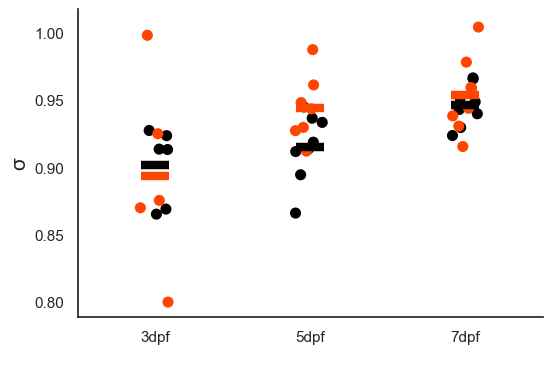

In [176]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
colors1  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
new_colors = np.vstack((colors1[0],np.vstack((colors1[2:4],colors1[5:]))))
colors = ['black', 'orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="age", y="Branching ratio", data = bdf, hue = 'condition', palette = colors, join=False, ci=2, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="age", y="Branching ratio", data = bdf, hue = 'condition', palette = colors, size = 8, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('σ', size = '15')
ax.legend_.remove()
#plt.ylim(0.5,1.3)
plt.show()